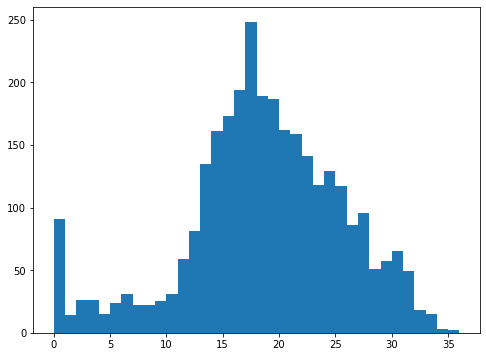

In [23]:
import math
import matplotlib.pyplot as plt

file = "../data/train_rmsd_list.txt" #"/scr/risa/mgeyer/data/ares_compare/test_str_rmsd.txt"#

with open(file) as fh:
    rmsd_list = []
    bin_dict = {}
    rmsd_dict = {}
    for line in fh.readlines():
        name, rmsd = (line.rstrip()).split("\t")
        rmsd = float(rmsd)
        rmsd_list.append(rmsd)
        ceil = math.ceil(rmsd)
        rmsd_dict[name] = rmsd
        if ceil not in bin_dict:
            bin_dict[ceil] = [name]
        else:
            bin_dict[ceil].append(name)



fig, axs = plt.subplots(figsize=(8, 6)) #layout='constrained',
axs.hist(rmsd_list, bins = range(int(min(rmsd_list)), int(max(rmsd_list))+1, 1))
plt.show()

In [24]:
print(len(bin_dict[0]))
print(len(bin_dict[1]))

10
81


Number of structures in the original set:	 3025
Number of structures in the truncated set:	 945


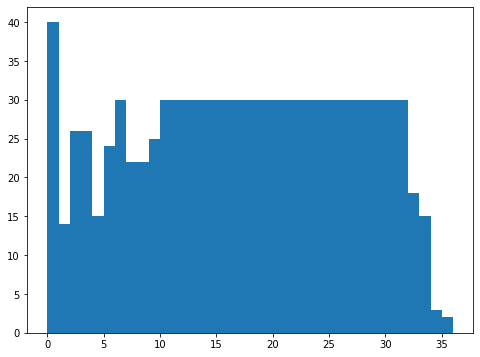

In [26]:
import random

max_nr_bins = 30

new_dict = {}
rmsd_list_new = []

for key in sorted(bin_dict):
    k = min(len(bin_dict[key]), max_nr_bins)
    new_list = random.sample(bin_dict[key], k=k) #choices(bin_dict[key], k=k)
    new_dict[key] = new_list
    for struc in new_list:
        rmsd_list_new.append(rmsd_dict[struc])

print("Number of structures in the original set:\t", len(rmsd_list))
print("Number of structures in the truncated set:\t", len(rmsd_list_new))
fig, axs = plt.subplots(figsize=(8, 6)) #layout='constrained', 
axs.hist(rmsd_list_new, bins = range(int(min(rmsd_list_new)), int(max(rmsd_list_new))+1, 1))
plt.show()

In [27]:
new_file = "../data/truncated_train_rmsd.txt"#"/scr/risa/mgeyer/data/ares_compare/reconstruct_nondup.txt" #

with open(new_file, "w") as fh:
    for key in new_dict:
        for struc in new_dict[key]:
            #if struc[0] == "2":
            fh.write(str(struc) + "\t" + str(rmsd_dict[struc]) + "\n") #+ "\n")#

In [22]:
with open("/scr/risa/mgeyer/data/ares_compare/reconstruct_str.txt", "r") as ofh:
    with open("/scr/risa/mgeyer/data/ares_compare/reconstruct_nondup.txt", "r") as dfh:
        ori = [f.rstrip() for f in ofh.readlines()]
        new = [e.rstrip() for e in dfh.readlines()]

comp = [g for g in new if g not in ori]

print(len(comp))

with open("/scr/risa/mgeyer/data/ares_compare/tobe_reconstr.txt", "w") as fh:
    for l in comp:
        fh.write(l+"\n")

227
